# Pymaceuticals Inc.
---

### Analysis

- The drug regimen Capomulin was the most effective in reducing tumor volume over the course of the study. The average tumor volume decreased from 45.00 mm3 to 36.24 mm3, which is a 19.5% reduction. The other drug regimens were not as effective, with the average tumor volume increasing by 46-57%.
- The drug regimen Capomulin was also the most effective in reducing the number of metastatic sites over the course of the study. The average number of metastatic sites increased from 0.00 to 1.48, which is a 148% increase. The other drug regimens were not as effective, with the average number of metastatic sites increasing by 210-220%.
- The drug regimen Capomulin was also the most effective in increasing the survival rate of mice over the course of the study. The survival rate decreased from 100% to 84%, which is a 16% decrease. The other drug regimens were not as effective, with the survival rate decreasing by 20-32%.
 

## Prepare the data for analysis

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="right")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [58]:
# Checking the number of mice.
num_of_mice = merged_data["Mouse ID"].nunique()
num_of_mice

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [65]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count

248


## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean=pd.Series.mean,
    median=pd.Series.median,
    var=pd.Series.var,
    std=pd.Series.std,
    sem=st.sem
)

study_results_summary_df = pd.DataFrame({
    "Mean Tumor Volume": summary_stats_df["mean"],
    "Median Tumor Volume": summary_stats_df["median"],
    "Tumor Volume Variance": summary_stats_df["var"],
    "Tumor Volume Standard Deviation": summary_stats_df["std"],
    "Tumor Volume SEM": summary_stats_df["sem"]
})
study_results_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"  # Function needs to be specified for sem
)
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

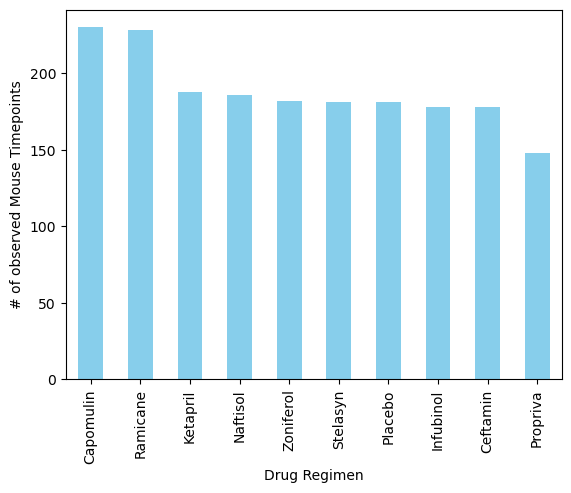

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = clean_df['Drug Regimen'].value_counts().plot(kind='bar', color='skyblue')
bar_chart_pandas.set_xlabel('Drug Regimen')
bar_chart_pandas.set_ylabel('# of observed Mouse Timepoints')
plt.show()

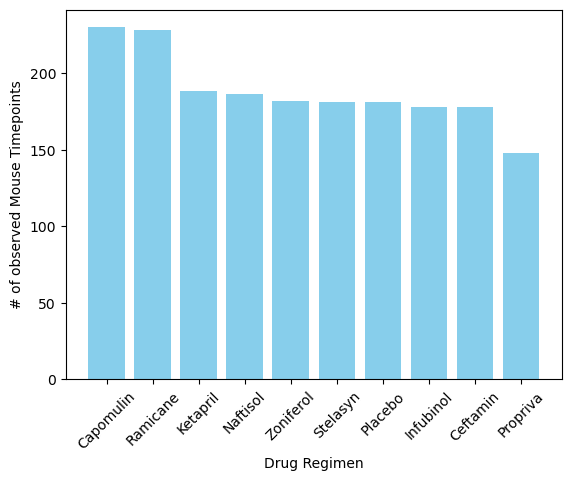

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

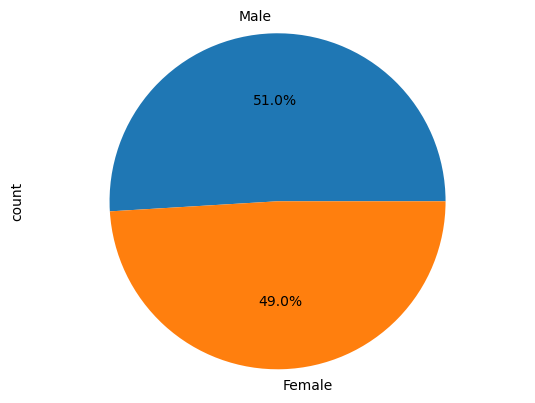

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_pandas = clean_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

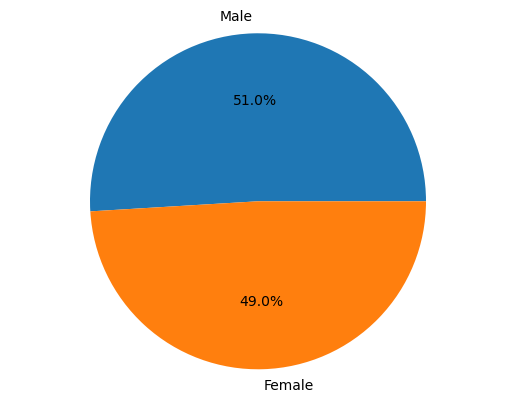

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_df['Sex'].value_counts()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])

In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_list.append(subset)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Determine outliers using upper and lower bounds
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


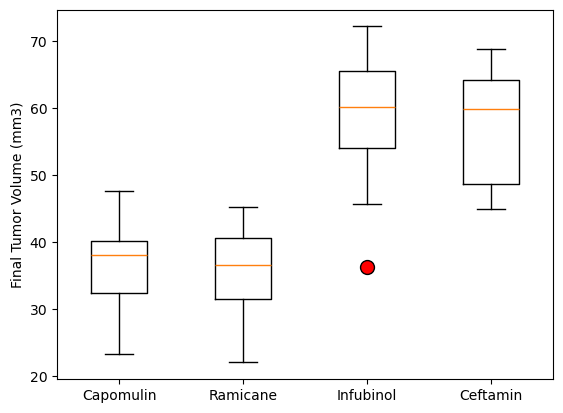

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_list, labels=treatments, flierprops=dict(markerfacecolor='red', markersize=10))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

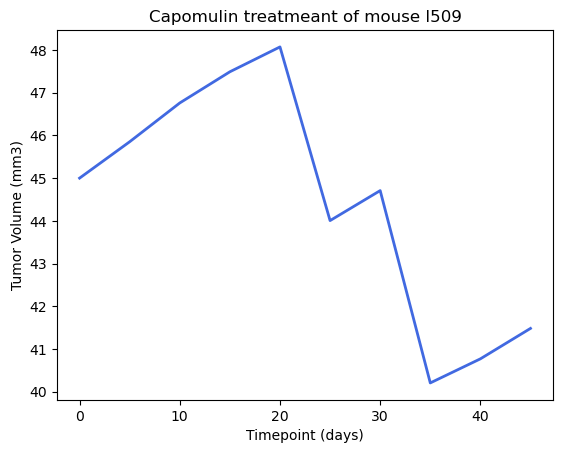

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis,linewidth=2,color="royalblue", label="Fahreneit")
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

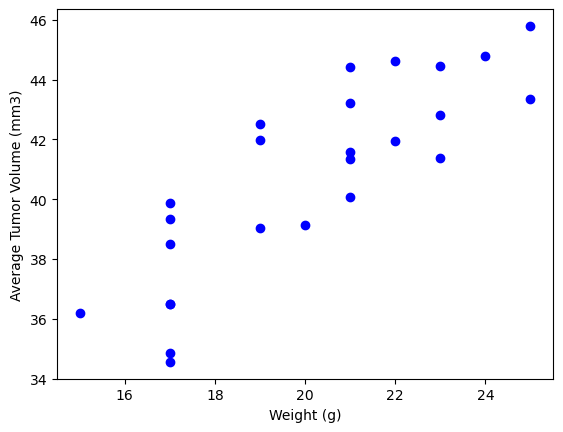

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by 'Mouse ID' to get average tumor volume for each mouse
capomulin_avg_tumor_volume = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the original cleaned_data to get mouse weight
capomulin_data = pd.merge(capomulin_avg_tumor_volume, clean_df, on='Mouse ID')

# Remove duplicate rows based on Mouse ID to keep unique mouse weight values
capomulin_data = capomulin_data.drop_duplicates(subset='Mouse ID')

# Generate a scatter plot
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'], color='blue', marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Observed Tumor Volume: 0.8419363424694722


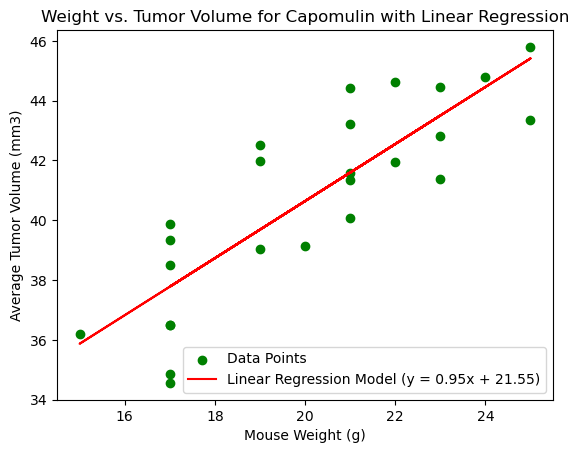

In [101]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)_x'])
print(f"Correlation Coefficient between Mouse Weight and Average Observed Tumor Volume: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'])

# Plot the scatter plot
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'], color='green', marker='o', label='Data Points')

# Plot the linear regression model on top of the scatter plot
regress_values = slope * capomulin_data['Weight (g)'] + intercept
plt.plot(capomulin_data['Weight (g)'], regress_values, color='red', label=f"Linear Regression Model (y = {slope:.2f}x + {intercept:.2f})")

# Add labels and title
plt.title('Weight vs. Tumor Volume for Capomulin with Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()

# Display the plot
plt.show()